<a href="https://colab.research.google.com/github/AleksandraOD/flaskProjectFinal/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.style as style
from matplotlib import pyplot as plt
import math
from sklearn.metrics import mean_squared_error
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)
style.use('fivethirtyeight')

In [13]:
import statistics

In [5]:
data_raw = pd.read_table("/content/drive/MyDrive/MIBA/PM/spb.real.estate.archive.2018.tsv")

In [6]:
data_raw.head()

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id
0,5490504238877583424,2014-11-27T00:00:00+03:00,2016-03-14T00:00:00+03:00,3676740.0,19,False,1,False,27.40,16.56,16.56,NaN,0.0,1,2,"Россия, Санкт-Петербург, улица Шкапина, 9-11",3552413344225333068
1,5490504238903444021,2014-11-27T00:00:00+03:00,2016-04-28T00:00:00+03:00,7038880.0,2,False,3,False,85.84,19.64,41.20,NaN,0.0,1,2,"Россия, Санкт-Петербург, Кушелевская дорога, 3к4",7274736308217971906
2,5490504238903447743,2014-11-27T00:00:00+03:00,2016-05-11T00:00:00+03:00,7038880.0,3,False,3,False,85.84,19.64,41.20,NaN,0.0,1,2,"Россия, Санкт-Петербург, Кушелевская дорога, 3к4",7274736308217971906
3,5490504238877673946,2014-11-27T00:00:00+03:00,2016-05-12T00:00:00+03:00,12074400.0,5,False,3,False,93.60,10.90,52.00,NaN,0.0,1,2,"Россия, Санкт-Петербург, Свердловская набережная, 58А",5917543958366039686
4,5490504238877648740,2014-11-27T00:00:00+03:00,2016-05-12T00:00:00+03:00,20406100.0,7,False,4,False,142.70,13.84,82.55,NaN,0.0,1,2,"Россия, Санкт-Петербург, Свердловская набережная, 58А",5917543958366039686


In [8]:
data_raw.shape

(429187, 17)

In [9]:
rent_df = data_raw[data_raw.offer_type == 2].copy()
print("Total rent data size: {}".format(len(rent_df)))
rent_df_spb = rent_df[rent_df.unified_address.str.contains('Россия, Санкт-Петербург')].copy()
print("Rent data size in city limits: {}".format(len(rent_df_spb)))

Total rent data size: 171186
Rent data size in city limits: 156054


In [12]:
rent_df_spb['price_per_sq_m'] = rent_df_spb.last_price/rent_df.area

In [14]:
rent_df_spb['house_price_sqm_median'] = statistics.median(rent_df_spb['price_per_sq_m'])

In [15]:
rent_df_cleaned = rent_df_spb[~((rent_df_spb.price_per_sq_m/rent_df_spb.house_price_sqm_median) > 5)]
rent_df_cleaned = rent_df_cleaned[rent_df_cleaned.last_price < 1000000]
rent_df_cleaned = rent_df_cleaned[~((rent_df_cleaned.price_per_sq_m > 3000) 
                                     & ((rent_df_cleaned.house_price_sqm_median < 1000) 
                                        | (rent_df_cleaned.house_price_sqm_median == rent_df_cleaned.price_per_sq_m)))]
rent_df_cleaned = rent_df_cleaned[~((rent_df_cleaned.price_per_sq_m < 250) 
                               & (rent_df_cleaned.house_price_sqm_median/rent_df_cleaned.price_per_sq_m >= 2))]
rent_df_cleaned = rent_df_cleaned[~((rent_df_cleaned.price_per_sq_m < 200) 
                                          & (rent_df_cleaned.price_per_sq_m == rent_df_cleaned.house_price_sqm_median))]

In [16]:
rent_df_spb['house_price_sqm_median']

1086      555.555556
1096      555.555556
1097      555.555556
1149      555.555556
1514      555.555556
             ...    
429182    555.555556
429183    555.555556
429184    555.555556
429185    555.555556
429186    555.555556
Name: house_price_sqm_median, Length: 156054, dtype: float64

In [17]:
rent_df_spb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156054 entries, 1086 to 429186
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   offer_id                156054 non-null  int64  
 1   first_day_exposition    156054 non-null  object 
 2   last_day_exposition     156054 non-null  object 
 3   last_price              156054 non-null  float64
 4   floor                   156054 non-null  int64  
 5   open_plan               156054 non-null  bool   
 6   rooms                   156054 non-null  int64  
 7   studio                  156054 non-null  bool   
 8   area                    156054 non-null  float64
 9   kitchen_area            118889 non-null  float64
 10  living_area             123565 non-null  float64
 11  agent_fee               123362 non-null  float64
 12  renovation              103117 non-null  float64
 13  offer_type              156054 non-null  int64  
 14  category_type    

<Axes: >

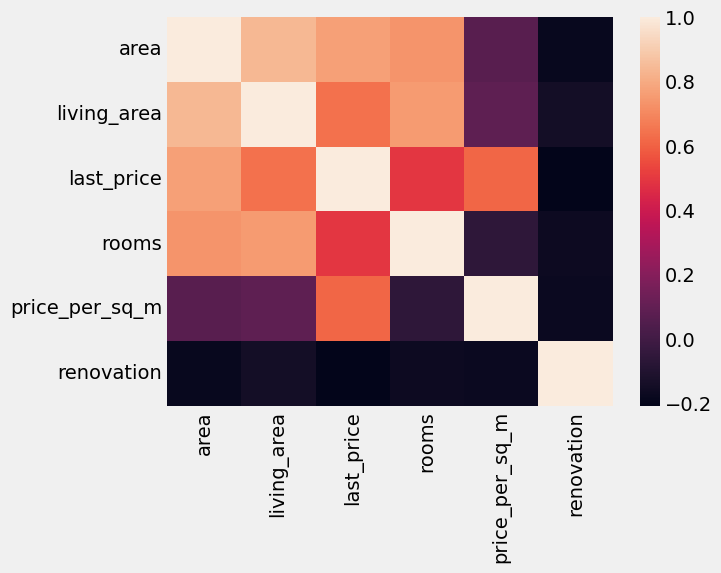

In [21]:
sns.heatmap(rent_df_cleaned[['area','living_area','last_price','rooms', "price_per_sq_m", 'renovation']].corr())

In [22]:
categorical = ['floor','open_plan','rooms','renovation','studio']

In [23]:
import seaborn as sns
from matplotlib import pyplot as plt

In [24]:
sns.set() 

<ipython-input-25-69f75fb6fdd1>:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x=feat, y='last_price', data=rent_df_cleaned, ax=ax, palette="husl")
<ipython-input-25-69f75fb6fdd1>:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x=feat, y='last_price', data=rent_df_cleaned, ax=ax, palette="husl")
<ipython-input-25-69f75fb6fdd1>:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x=feat, y='last_price', data=rent_df_cleaned, ax=ax, palette="husl")
<ipython-input-25-69f75fb6fdd1>:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x=feat, y='last_price', data=rent_df_cleaned, ax=ax, palette="husl")
<ipython-input-25-69f75fb6fdd1>:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x=feat, y='last_price', data=rent_df_cleaned, ax=ax, palette="husl")


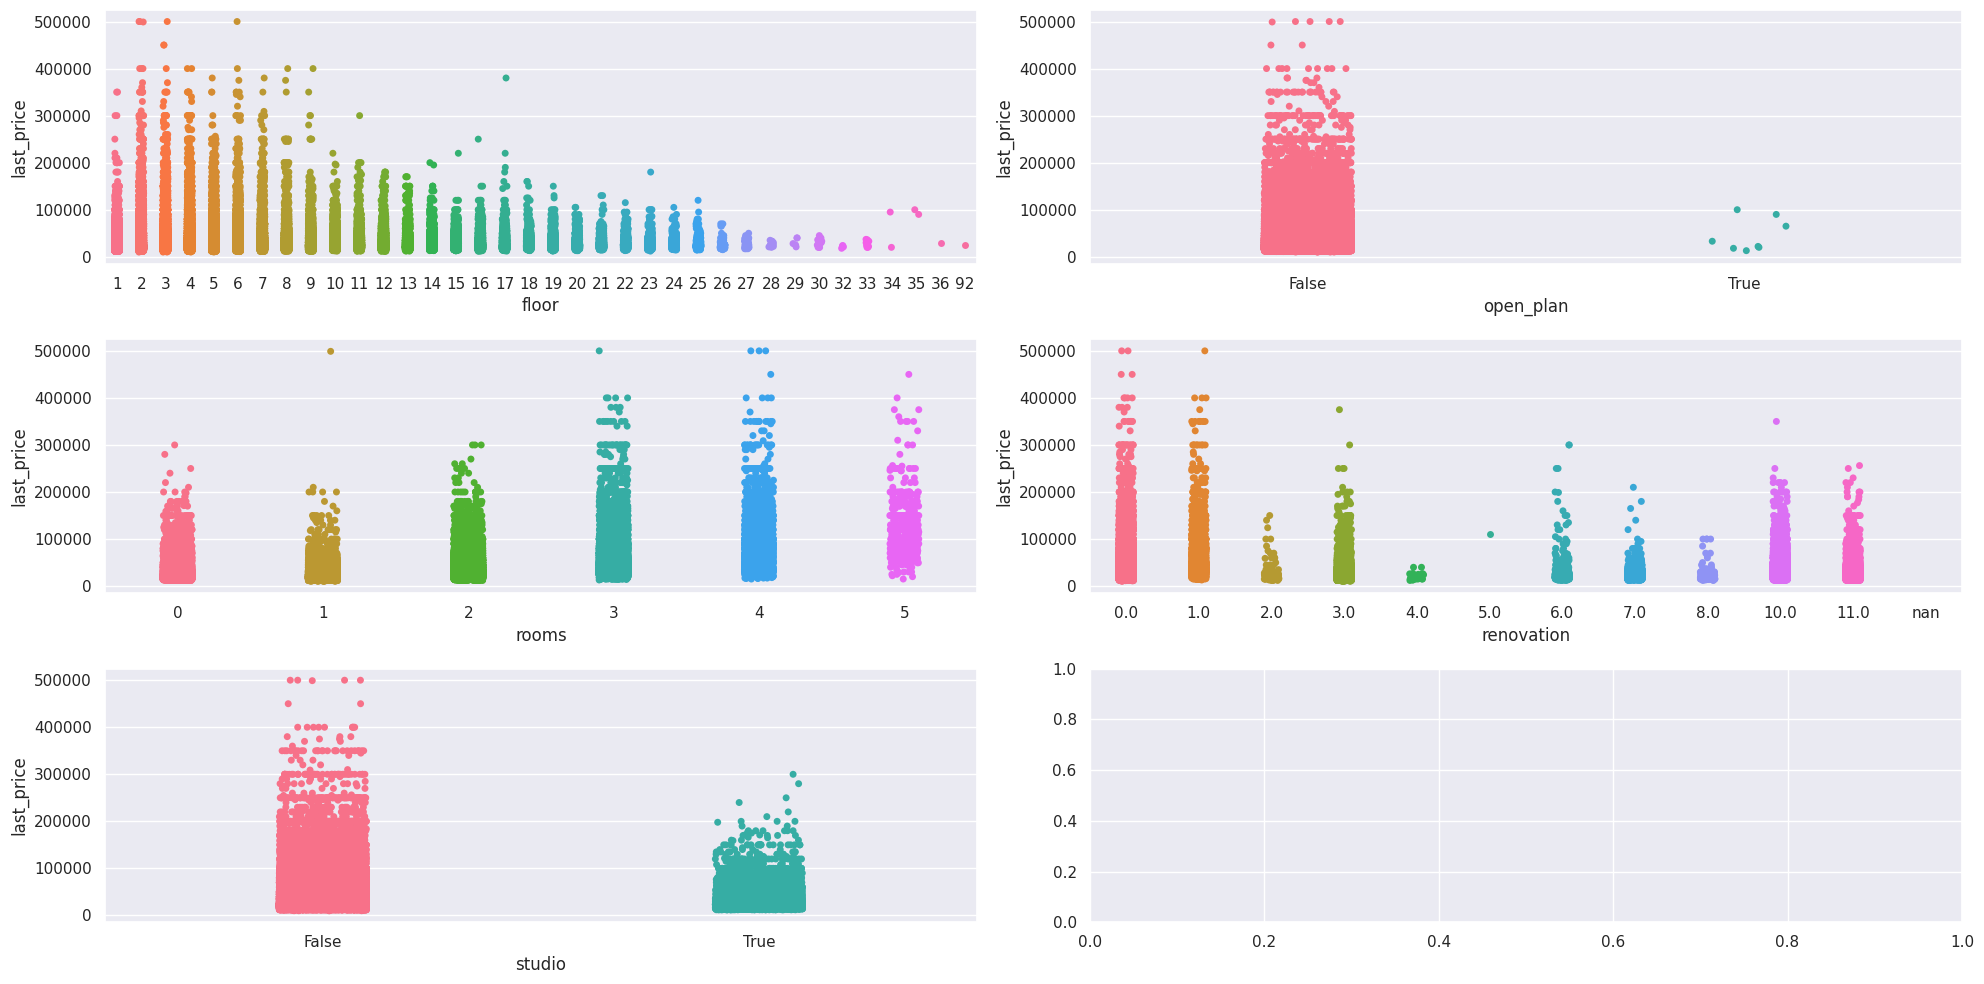

In [25]:
fig, axes = plt.subplots(nrows=3,ncols=2, figsize = (20,10))
for idx, feat in enumerate(categorical):
    ax = axes[int(idx/2),idx%2]
    sns.stripplot(x=feat, y='last_price', data=rent_df_cleaned, ax=ax, palette="husl")
    ax.set_xlabel(feat)
fig.tight_layout()

In [26]:
rent_df_cleaned['open_plan'] = rent_df_cleaned['open_plan'].astype('int')
rent_df_cleaned['studio'] = rent_df_cleaned['studio'].astype('int')

In [29]:
rent_df_cleaned.drop(columns=['kitchen_area','living_area','building_id','floor','studio'], inplace=True)

KeyError: ignored

In [30]:
rent_df_cleaned.drop(columns=['agent_fee','offer_id','price_per_sq_m','house_price_sqm_median', 'category_type','offer_type'], inplace=True)

In [35]:
rent_df_cleaned.head()

,first_day_exposition,last_day_exposition,last_price,open_plan,rooms,area,renovation,unified_address
1086,2015-01-24T00:00:00+03:00,2016-01-19T00:00:00+03:00,20000.0,0,1,28.0,3.0,"Россия, Санкт-Петербург, Богатырский проспект, 5к1"
1096,2015-01-25T00:00:00+03:00,2016-01-20T00:00:00+03:00,40000.0,0,2,72.0,0.0,"Россия, Санкт-Петербург, набережная реки Фонтанки, 66"
1097,2015-01-25T00:00:00+03:00,2016-01-21T00:00:00+03:00,45000.0,0,2,55.0,0.0,"Россия, Санкт-Петербург, Большой проспект П.С., 102"
1149,2015-01-28T00:00:00+03:00,2016-01-16T00:00:00+03:00,21000.0,0,1,35.0,11.0,"Россия, Санкт-Петербург, Лужская улица, 8"
1514,2015-02-13T00:00:00+03:00,2016-01-23T00:00:00+03:00,25000.0,0,1,44.0,10.0,"Россия, Санкт-Петербург, Учительская улица, 3"


In [36]:
rent_df_cleaned.to_csv('/content/drive/MyDrive/MIBA/PM/cleaned_dataset.csv', index=False)